In [63]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [64]:
# Reading in the Application and Credit Records csv
url_application = "https://raw.githubusercontent.com/manish-cr/CS3244-credit-approval/master/data/application_cleaned.csv"
url_credit_train = "https://raw.githubusercontent.com/manish-cr/CS3244-credit-approval/master/data/credit_cleaned_training.csv"
url_credit_test = "https://raw.githubusercontent.com/manish-cr/CS3244-credit-approval/master/data/credit_cleaned_test.csv"

application_df = pd.read_csv(url_application)
credit_train = pd.read_csv(url_credit_train)
credit_test = pd.read_csv(url_credit_test)

In [65]:
# Only the Label column is needed, ID is used as the key when merging the datasets
credit_train = credit_train[['ID', 'Credit_Status']]

In [66]:
# Merging application and credit csv based on ID
train_df = pd.merge(application_df, credit_train, how="inner", on="ID").loc[:,'ID':]
test_df = pd.merge(application_df, credit_test, how="inner", on="ID").loc[:,'ID':]

In [83]:
train_df.Credit_Status.value_counts()

Credit_Status
Good    15760
Bad     13485
Name: count, dtype: int64

In [67]:
# need to fix these dtype from int64 to categorical
print(train_df.FLAG_WORK_PHONE.value_counts())
print(train_df.FLAG_PHONE.value_counts())
print(train_df.FLAG_EMAIL.value_counts())

FLAG_WORK_PHONE
0    22650
1     6595
Name: count, dtype: int64
FLAG_PHONE
0    20647
1     8598
Name: count, dtype: int64
FLAG_EMAIL
0    26632
1     2613
Name: count, dtype: int64


In [68]:
columns_to_convert = ['FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']

# Convert the data type of the specified columns to object
train_df[columns_to_convert] = train_df[columns_to_convert].astype('object')
test_df[columns_to_convert] = test_df[columns_to_convert].astype('object')

In [69]:
# Looking at the types of features
train_df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_WORK_PHONE         object
FLAG_PHONE              object
FLAG_EMAIL              object
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
Credit_Status           object
dtype: object

In [70]:
# Separating the data into X and y
X_train = train_df.loc[:, "CODE_GENDER":"CNT_FAM_MEMBERS"]
y_train = train_df["Credit_Status"]

X_test = test_df.loc[:, "CODE_GENDER":"CNT_FAM_MEMBERS"]
y_test = test_df["Credit_Status"]

In [71]:
# Identifying the columns that are of type int64 and float64 (for train)
numeric_col = []
for names in X_train.columns:
  if X_train[names].dtypes in ['int64', 'float64']:
    numeric_col.append(names)

# Standardising the columns of type int64 and float64
features = X_train[numeric_col]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train[numeric_col] = features

# for test
features = X_test[numeric_col]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test[numeric_col] = features

In [72]:
# Identifying the columns that are of type object
categorical_col = []
for names in X_train.columns:
  if X_train[names].dtypes in ['object']:
    categorical_col.append(names)

## One Hot Encoding the categorical columns (train)
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the specified columns
encoded_columns = encoder.fit_transform(X_train[categorical_col])

# Create a DataFrame from the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_col))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
X_train = pd.concat([X_train, encoded_df], axis=1)

# Drop the original categorical columns if needed
X_train = X_train.drop(categorical_col, axis=1)

C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [73]:
## One Hot Encoding the categorical columns (test)
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the specified columns
encoded_columns = encoder.fit_transform(X_test[categorical_col])

# Create a DataFrame from the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_col))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
X_test = pd.concat([X_test, encoded_df], axis=1)

# Drop the original categorical columns if needed
X_test = X_test.drop(categorical_col, axis=1)

C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [74]:
numeric_col

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS']

In [75]:
categorical_col

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE']

In [76]:
# ## Using Label Encoder

# # Create an instance of LabelEncoder
# label_encoder = LabelEncoder()

# # Apply label encoding to the specified columns
# for column in categorical_col:
#     X[column] = label_encoder.fit_transform(df[column])

# df = X

In [77]:
X_test.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Pensioners,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
0,-0.598602,2.375991,0.925126,-0.818587,-0.220994,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.598602,-0.499443,-0.445771,0.119404,-0.220994,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.598602,-0.499443,-0.445771,0.119404,-0.220994,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.598602,-0.543680,1.242382,0.144899,-0.220994,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.598602,-0.278255,1.393886,0.042359,-0.220994,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
X_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Pensioners,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
0,-0.57519,2.363373,0.950174,-0.813231,-0.216878,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.57519,-0.730856,-1.305603,0.109496,-0.216878,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.57519,0.816258,-0.742433,-0.409538,-1.310805,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.57519,0.816258,-0.742433,-0.409538,-1.310805,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.57519,0.816258,-0.742433,-0.409538,-1.310805,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


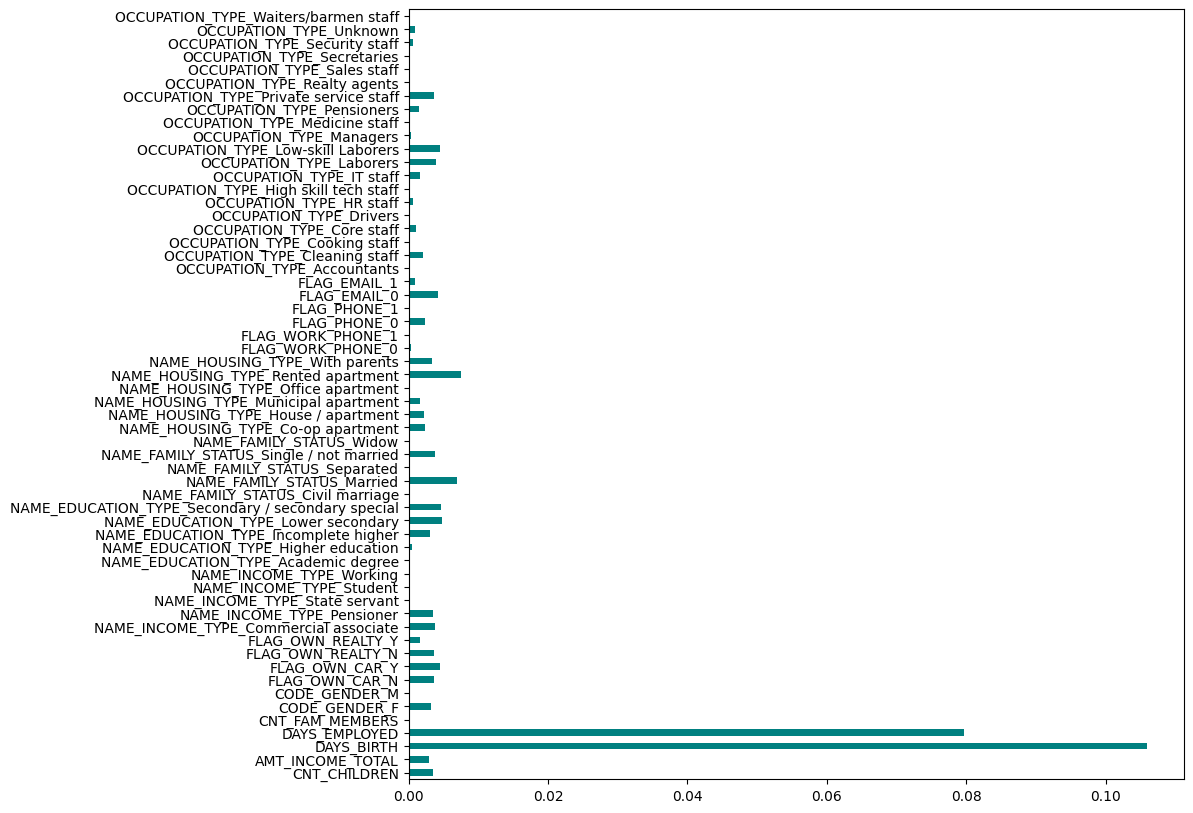

In [79]:
# Feature Selection by Filter method
# Information Gain
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X_train, y_train)
feat_importances = pd.Series(importances, X_train.columns)

plt.figure(figsize=(10, 10))
feat_importances.plot(kind='barh', color='teal')
plt.show()

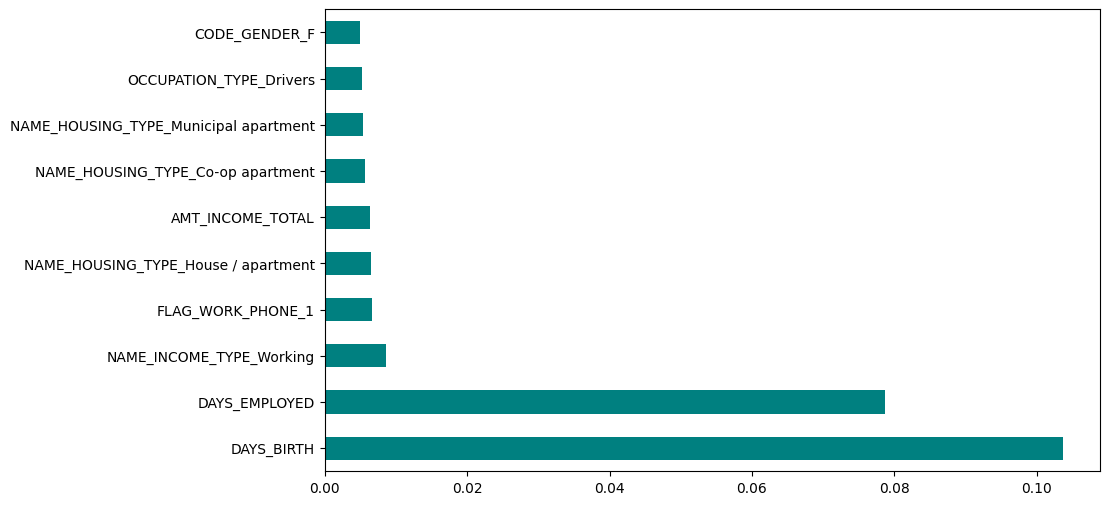

In [80]:
# top 10
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X_train, y_train)
feat_importances = pd.Series(importances, X_train.columns)

# Select the top 10 features
top_10_feats = feat_importances.nlargest(10)


plt.figure(figsize=(10, 6))
top_10_feats.plot(kind='barh', color='teal')
plt.show()

In [81]:
#############
# Retroactively pick and choose your feature guys
#############

In [82]:
data_list = [
    X_train,
    y_train,
    X_test,
    y_test
]

import pickle
data_list_filepath = "../data/my_pickled_data.pkl"
with open(data_list_filepath,"wb") as file:
    pickle.dump(data_list,file)